# Population and samples in statistics

## Libraries and settings

In [79]:
# Libraries
import os
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data-analytics/Week_06


## Board Games

This dataset was taken from [Kaggle](https://www.kaggle.com/datasets/sujaykapadnis/board-games).

In [80]:
df = pd.read_csv('board_games.csv', sep=',', encoding='utf-8')
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


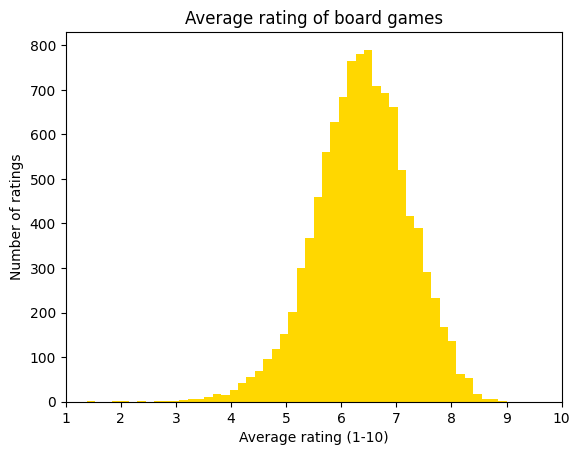

In [81]:
# Setting a seed to restore the random numbers later
random.seed(42)

# Get average_rating column from the dataframe
pop = df['average_rating']

# Plot histogram based on the data
plt.hist(pop, bins = 50, color='gold')
plt.title('Average rating of board games')
plt.xlabel('Average rating (1-10)')
plt.ylabel('Number of ratings')
plt.xlim(xmin=1, xmax=10)

plt.show()

## Single random sample from the population

Mean: 6.4112
Standard deviation: 0.8391


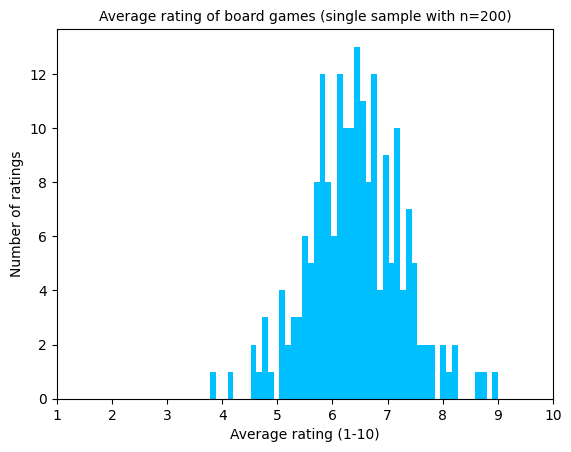

In [82]:
# Sample size
sample_size = 200

# Setting a seed to restore the random numbers later
random.seed(42)

# Random sample
random_sample = random.sample(list(pop), sample_size)

# Statistics of the sample
print(f'Mean: {statistics.mean(random_sample):.4f}')
print(f'Standard deviation: {statistics.stdev(random_sample):.4f}')

# Plot histogram based on the sample
plt.hist(random_sample, bins = 50, color='deepskyblue')
plt.title(f'Average rating of board games (single sample with n={sample_size})', fontsize=10)
plt.xlabel('Average rating (1-10)')
plt.ylabel('Number of ratings')
plt.xlim(xmin=1, xmax=10)

plt.show()

## Repeated random sampling 'with replacement' (bootstrapping)

179.8763
24.9497


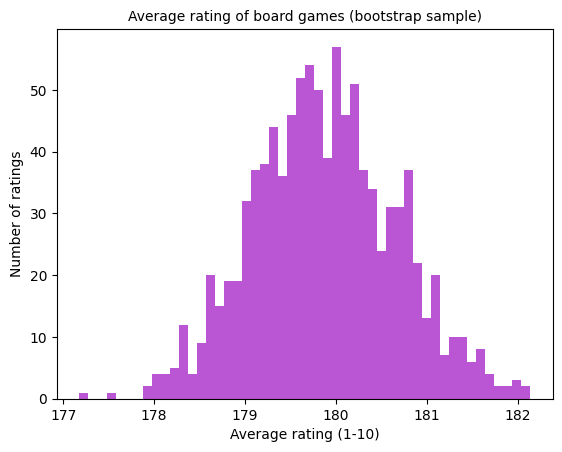

In [83]:
def bootstrap(p_mean= 2800, p_std= 240, num_iter = 5000, sample_size = 200):
    """
    Creates bootstrap sample from a distribution.

    :param p_mean population mean. Type = int, float
    :param p_std. Type = int, float
    :param p_n. Type = int, float
    :param num_iterations: number of iterations. Type = int
    :param sample_size: size of single bootstrap sample. Type = int
    :return: plot of bootstrap sample.
    """

    # Setting a seed to restore the random numbers later
    random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std  = []

    # Loop for iterations
    for i in range(num_iter):
        samp = random.sample(pop.tolist(), sample_size)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and sd of bootsstapped distribution
    print(f'{np.mean(sample_mean):.4f}')
    print(f'{np.mean(sample_std):.4f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins = 50, color='mediumorchid')
    plt.title('Average rating of board games (bootstrap sample)', fontsize=10)
    plt.xlabel('Average rating (1-10)')
    plt.ylabel('Number of ratings')
    plt.show()

# Function call
bootstrap(p_mean=180, p_std=25, num_iter = 1000, sample_size = 1000)


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [84]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-10-27 12:33:40
Python Version: 3.10.13
-----------------------------------
